In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import statsmodels.api as sm
import statsmodels.stats.weightstats as ws

In [2]:
conn = sqlite3.connect('poker_updated.db')

In [3]:
df = pd.read_sql_query('select * from Hands order by player_ID, game_ID limit 1000000;', conn)
print(df.head())

          game_ID data_source      player_ID card1 card2   bets  net_gain  \
0  20161229165011           k  !MushroomMan!  None  None   0.50     -0.50   
1  20161229165348           k  !MushroomMan!  None  None   0.25      0.25   
2  20161229165420           k  !MushroomMan!  None  None   0.25     -0.25   
3  20161229165437           k  !MushroomMan!    Qc    Qd  24.50     22.29   
4  20161229165454           k  !MushroomMan!  None  None   0.50     -0.50   

   chips_at_beginning  
0               25.00  
1               24.50  
2               24.75  
3               24.50  
4               25.39  


In [4]:
position_in_day = []
net_gain = []
curr_game_id = ''
curr_player_id = ''
curr_position_in_day = 0
for row in df.itertuples():
    game_id = row.game_ID[:8]
    player_id = row.player_ID
    if game_id != curr_game_id or player_id != curr_player_id:
        curr_position_in_day = 0
        curr_game_id = game_id
        curr_player_id = player_id
    position_in_day.append(curr_position_in_day)
    net_gain.append(row.net_gain)
    curr_position_in_day += 1
    
print(position_in_day[:50])
print(net_gain[:50])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[-0.5, 0.25, -0.25, 22.29, -0.5, 0.0, -0.25, 0.0, 0.0, 0.0, 0.44999999999999996, 0.0, 0.0, 0.75, 0.0, 0.0, -0.5, 0.69, 0.5, 0.0, 0.44999999999999996, 0.0, 0.0, -0.25, 0.0, -0.5, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, -0.25, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, 12.2, -0.25, 10.16, 0.0, -0.5, -0.25]


In [5]:
position_in_day = []
net_gain = []
curr_player_id = ''
curr_position_in_day = 0
for row in df.itertuples():
    game_id = row.game_ID[:8]
    player_id = row.player_ID
    if player_id != curr_player_id:
        curr_position_in_day = 0
        curr_player_id = player_id
    position_in_day.append(curr_position_in_day)
    net_gain.append(row.net_gain)
    curr_position_in_day += 1
    
print(position_in_day[:50])
print(net_gain[:50])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[-0.5, 0.25, -0.25, 22.29, -0.5, 0.0, -0.25, 0.0, 0.0, 0.0, 0.44999999999999996, 0.0, 0.0, 0.75, 0.0, 0.0, -0.5, 0.69, 0.5, 0.0, 0.44999999999999996, 0.0, 0.0, -0.25, 0.0, -0.5, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, -0.25, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, 12.2, -0.25, 10.16, 0.0, -0.5, -0.25]


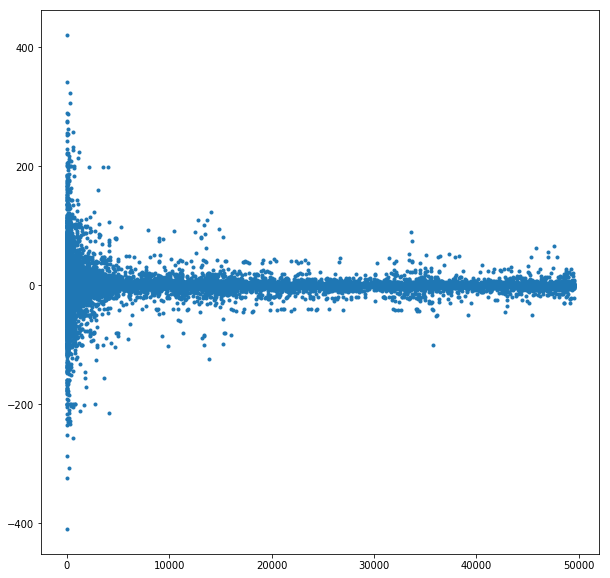

In [6]:
fig,ax = plt.subplots(1, 1,figsize=(10, 10))
ax.scatter(position_in_day, net_gain, marker='.')
plt.show()

In [7]:
x = sm.add_constant(position_in_day)
model = sm.OLS(net_gain, x)

In [8]:

res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3848
Date:                Wed, 08 Apr 2020   Prob (F-statistic):              0.535
Time:                        13:22:51   Log-Likelihood:            -1.0247e+06
No. Observations:              291291   AIC:                         2.049e+06
Df Residuals:                  291289   BIC:                         2.049e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0461      0.016     -2.813      0.0

In [9]:
net_gain_today = 0
after_win = []
after_loss = []
curr_game_id = ''
curr_player_id = ''
for row in df.itertuples():
    game_id = row.game_ID[:8]
    player_id = row.player_ID
    if game_id != curr_game_id or player_id != curr_player_id:
        net_gain_today = 0
        curr_game_id = game_id
        curr_player_id = player_id
        continue
    if net_gain_today > 0:
        after_win.append(row.net_gain)
    elif net_gain_today < 0:
        after_loss.append(row.net_gain)
    net_gain_today += row.net_gain




In [10]:
net_gain_today = 0
after_win = []
after_loss = []
curr_game_id = ''
curr_player_id = ''
for row in df.itertuples():
    game_id = row.game_ID[:8]
    player_id = row.player_ID
    if game_id != curr_game_id or player_id != curr_player_id:
        net_gain_today = 0
        curr_game_id = game_id
        curr_player_id = player_id
        continue
    if net_gain_today > 0:
        if row.net_gain > 0:
            after_win.append(1)
        else:
            after_win.append(0)
    elif net_gain_today < 0:
        if row.net_gain > 0:
            after_loss.append(1)
        else:
            after_loss.append(0)
    net_gain_today += row.net_gain


In [11]:
print(np.mean(after_win))
print(np.mean(after_loss))
print(np.var(after_win))
print(np.var(after_loss))

print(ws.ttest_ind(after_win, after_loss))

0.17286337957998024
0.1656933340893198
0.14298163158016794
0.13823905312768478
(4.985795665000978, 6.17444633906457e-07, 277154.0)


<BarContainer object of 2 artists>

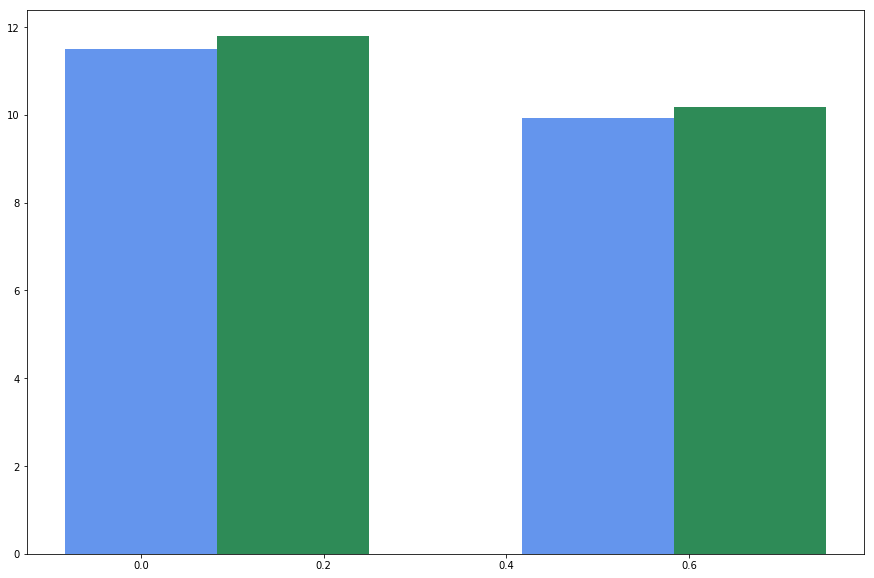

In [44]:
a_heights, a_bins = np.histogram(after_win, bins=2)
b_heights, b_bins = np.histogram(after_loss, bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(a_bins[:-1], np.log(a_heights), width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, np.log(b_heights), width=width, facecolor='seagreen')

In [53]:
game_number_today = 0
net_gain_today = 0
curr_game_id = ''
curr_player_id = ''
day_length = []
net_gain = []
for row in df.itertuples():
    game_id = row.game_ID[:8]
    player_id = row.player_ID
    if game_id != curr_game_id or player_id != curr_player_id:
        if game_number_today < 1000:
            day_length.append(game_number_today)
            net_gain.append(net_gain_today)
        net_gain_today = 0
        game_number_today = 0
        curr_game_id = game_id
        curr_player_id = player_id
        continue
    net_gain_today += row.net_gain
    game_number_today += 1

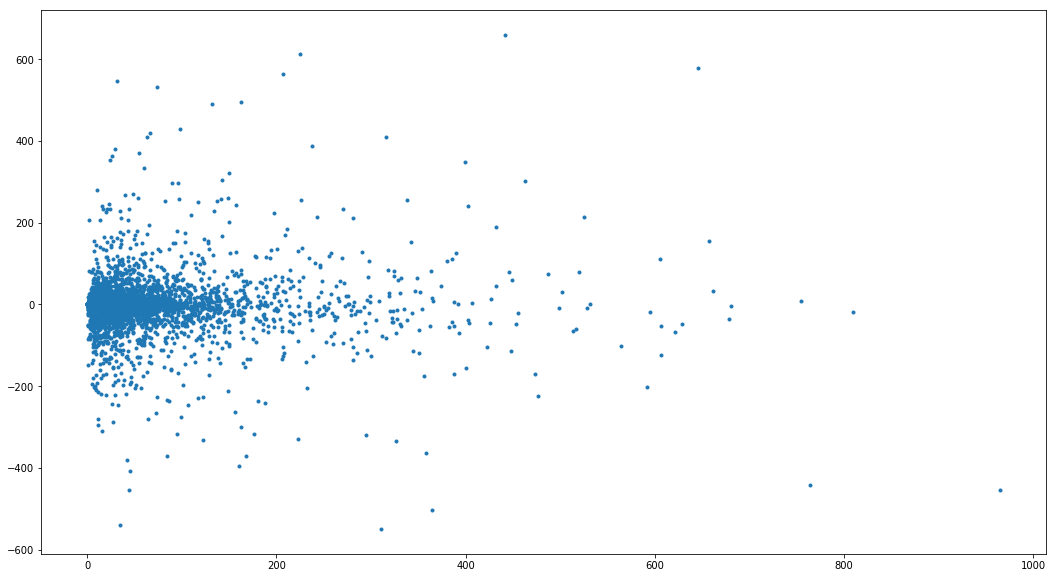

In [54]:
fig,ax = plt.subplots(1, 1,figsize=(18, 10))
ax.scatter(day_length, net_gain, marker='.')
plt.show()

In [55]:
x = sm.add_constant(day_length)
model = sm.OLS(net_gain, x)

In [56]:
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05850
Date:                Sun, 05 Apr 2020   Prob (F-statistic):              0.809
Time:                        22:44:05   Log-Likelihood:                -26242.
No. Observations:                4708   AIC:                         5.249e+04
Df Residuals:                    4706   BIC:                         5.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2522      1.108     -2.032      0.0

In [57]:
net_gain_today = 0
y = []
x = []
curr_game_id = ''
curr_player_id = ''
for row in df.itertuples():
    game_id = row.game_ID[:8]
    player_id = row.player_ID
    if game_id != curr_game_id or player_id != curr_player_id:
        net_gain_today = 0
        curr_game_id = game_id
        curr_player_id = player_id
        continue
    x.append(net_gain_today)
    y.append(row.net_gain)
    net_gain_today += row.net_gain

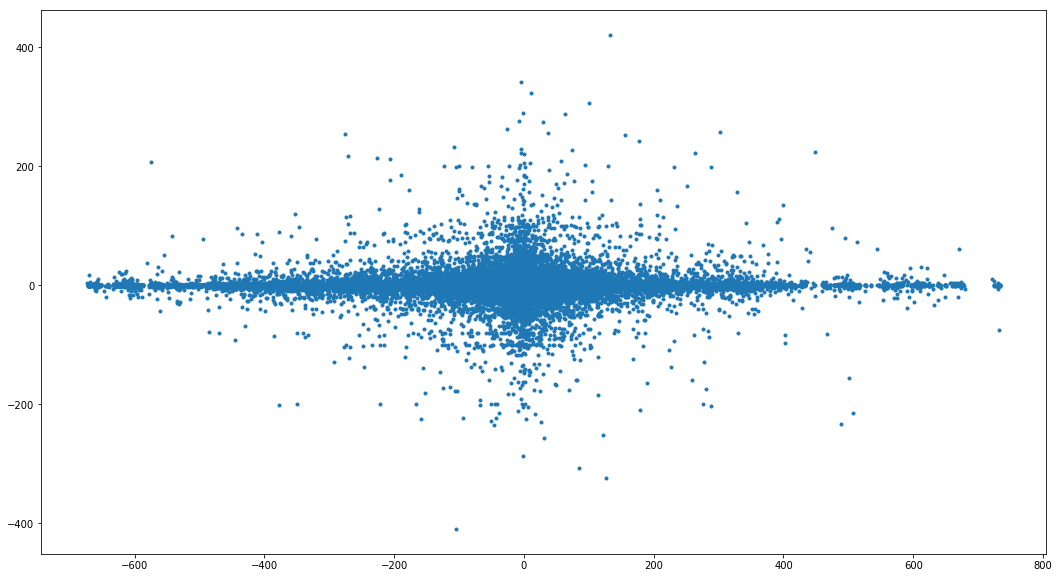

In [58]:
fig,ax = plt.subplots(1, 1,figsize=(18, 10))
ax.scatter(x, y, marker='.')
plt.show()

In [59]:
x = sm.add_constant(day_length)
model = sm.OLS(net_gain, x)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05850
Date:                Sun, 05 Apr 2020   Prob (F-statistic):              0.809
Time:                        22:46:59   Log-Likelihood:                -26242.
No. Observations:                4708   AIC:                         5.249e+04
Df Residuals:                    4706   BIC:                         5.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2522      1.108     -2.032      0.0